<a href="https://colab.research.google.com/github/mattstaney/AIML-Projects/blob/main/MattStaney_AML_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.

!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Operation cancelled by user


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

## Loading the dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/BankChurners.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


## Data Overview

- Observations
- Sanity checks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

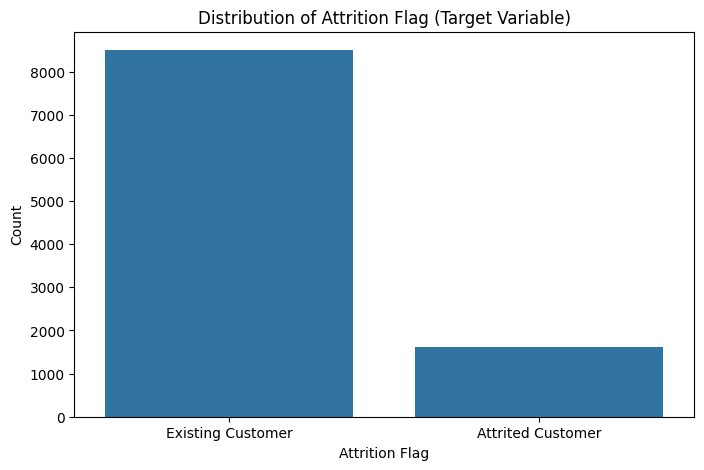

(CLIENTNUM                      0
 Attrition_Flag                 0
 Customer_Age                   0
 Gender                         0
 Dependent_count                0
 Education_Level             1519
 Marital_Status               749
 Income_Category                0
 Card_Category                  0
 Months_on_book                 0
 Total_Relationship_Count       0
 Months_Inactive_12_mon         0
 Contacts_Count_12_mon          0
 Credit_Limit                   0
 Total_Revolving_Bal            0
 Avg_Open_To_Buy                0
 Total_Amt_Chng_Q4_Q1           0
 Total_Trans_Amt                0
 Total_Trans_Ct                 0
 Total_Ct_Chng_Q4_Q1            0
 Avg_Utilization_Ratio          0
 dtype: int64,
           CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
 count  1.012700e+04  10127.000000     10127.000000    10127.000000   
 mean   7.391776e+08     46.325960         2.346203       35.928409   
 std    3.690378e+07      8.016814         1.298908       

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
df.info()

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display summary statistics for numerical features
summary_stats = df.describe()

# Plot the distribution of the target variable (Attrition_Flag)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Attrition_Flag')
plt.title('Distribution of Attrition Flag (Target Variable)')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

# Display missing values and summary statistics
missing_values, summary_stats


**Key observations from the dataset summary:**

# Missing Values:

* Education_Level and Marital_Status have missing values.

* We need to handle these missing values before building models.

# Target Variable (Attrition_Flag):

* There are two categories: "Existing Customer" and "Attrited Customer".
* We see a class imbalance that might need to be addressed through oversampling/undersampling.

# Numerical Features:

* The summary statistics give a sense of the central tendencies and spread of each feature.
* Features like Credit_Limit, Total_Trans_Amt, and Avg_Utilization_Ratio vary widely.





## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

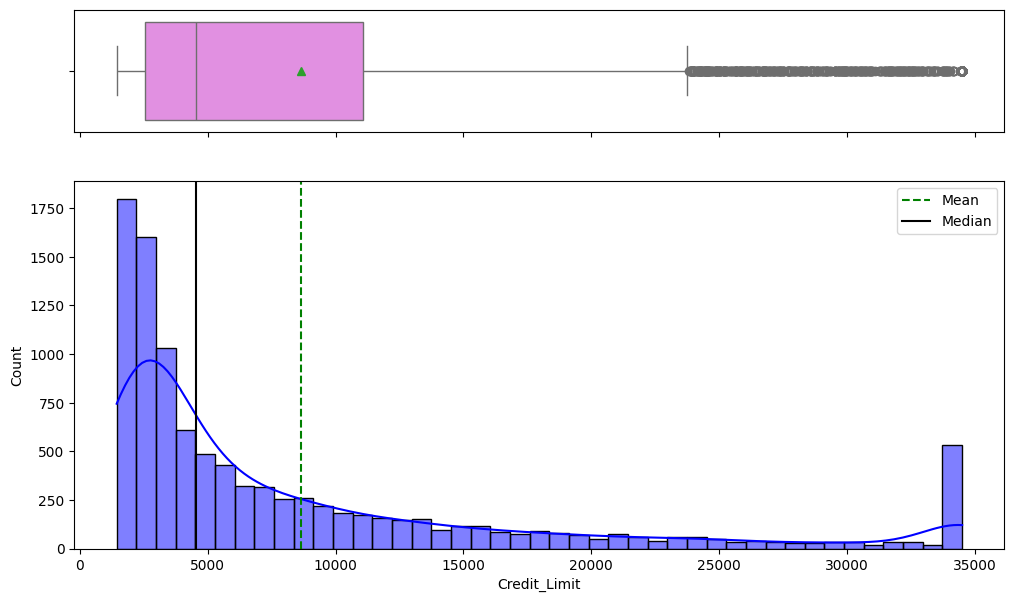

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    # Boxplot will be created and a triangle will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    # For histogram
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="blue")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="blue")

    # Add mean and median to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label='Mean')
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-", label='Median')
    ax_hist2.legend()

    plt.show()

# Testing the function on the 'Credit_Limit' feature
histogram_boxplot(df, 'Credit_Limit', kde=True)

<ipython-input-10-635d48aa895f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


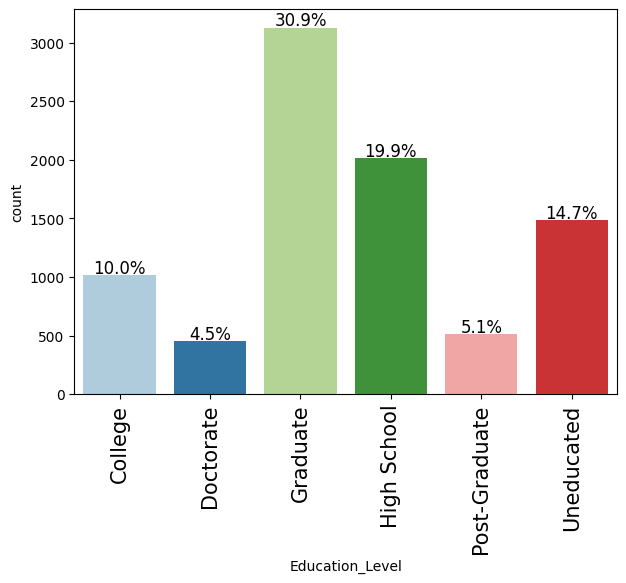

In [ ]:
# Defining the labeled_barplot function for Exploratory Data Analysis
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()

    # Set the figure size based on number of unique values or specified n
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)

    # Creating the barplot with the order defined by value counts
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    # Adding labels to the bars
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # x position for label
        y = p.get_height()  # y position for label

        # Annotate the bar with the label
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()  # show the plot

# Testing the function on the 'Education_Level' feature
labeled_barplot(df, 'Education_Level', perc=True)

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


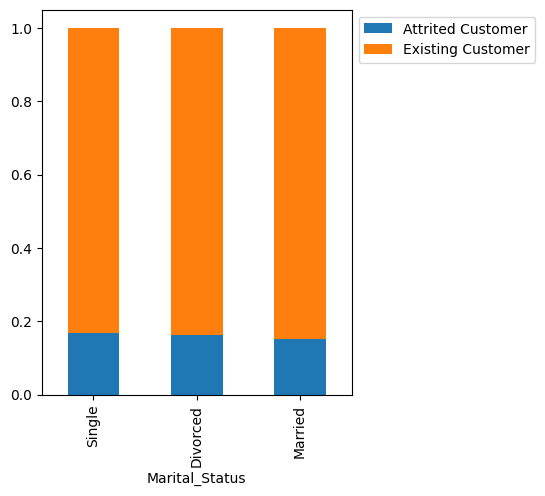

In [ ]:
# Defining the stacked_barplot function for Exploratory Data Analysis
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    # Get the number of unique values in the predictor
    count = data[predictor].nunique()

    # Sorting by the least common target value for better visualization
    sorter = data[target].value_counts().index[-1]

    # Cross-tabulation for counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)

    # Cross-tabulation for proportions
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)

    # Plotting the stacked bar chart
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Testing the function with 'Marital_Status' as predictor and 'Attrition_Flag' as target
stacked_barplot(df, 'Marital_Status', 'Attrition_Flag')


<ipython-input-12-ceb62210c162>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-12-ceb62210c162>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


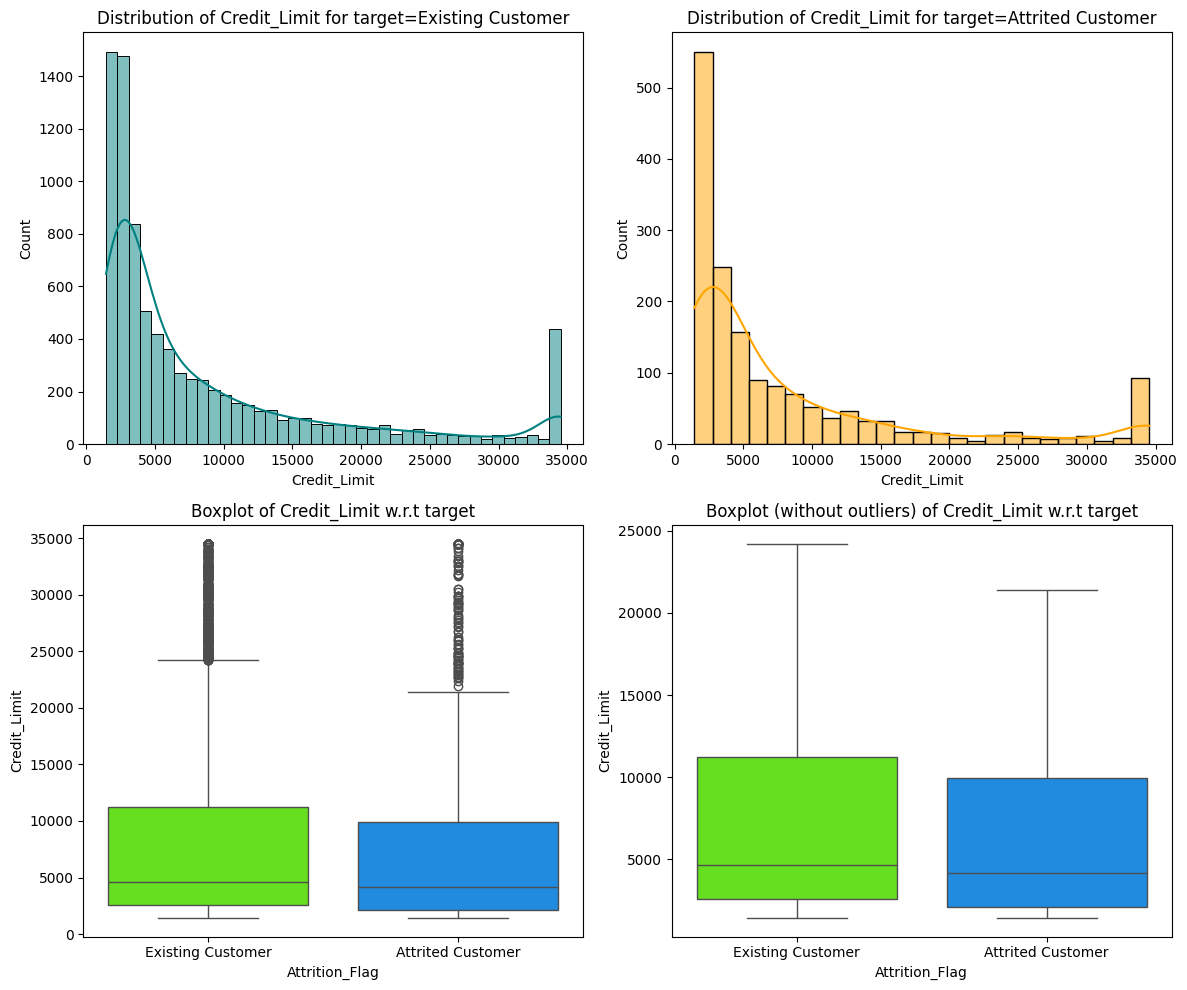

In [ ]:
# Defining the distribution_plot_wrt_target function for Exploratory Data Analysis
def distribution_plot_wrt_target(data, predictor, target):
    """
    Plot distributions of a predictor with respect to the target variable.

    data: dataframe
    predictor: independent variable to plot
    target: target variable to differentiate the plots
    """
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Get unique values of the target variable
    target_uniq = data[target].unique()

    # Plot the distribution of the predictor for the first target value
    axs[0, 0].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    # Plot the distribution of the predictor for the second target value
    axs[0, 1].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    # Boxplot with respect to the target variable
    axs[1, 0].set_title("Boxplot of " + predictor + " w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    # Boxplot without outliers with respect to the target variable
    axs[1, 1].set_title("Boxplot (without outliers) of " + predictor + " w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

# Testing the function with 'Credit_Limit' as predictor and 'Attrition_Flag' as target
distribution_plot_wrt_target(df, 'Credit_Limit', 'Attrition_Flag')


## Data Pre-processing

In [ ]:
# Data Pre-processing Code

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


# Step 1: Dropping Irrelevant Columns
# Dropping the CLIENTNUM column as it's just an identifier and won't help in prediction
df.drop(['CLIENTNUM'], axis=1, inplace=True)

# Step 2: Encoding Categorical Variables
categorical_features = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Step 3: Feature Scaling
# Splitting the dataset into features (X) and target (y)
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Displaying the shape of the training and testing sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape



((8101, 19), (2026, 19), (8101,), (2026,))

## Missing value imputation




In [ ]:
# Missing Value Imputation Code

# Step 1: Checking for Missing Values
missing_values = df.isnull().sum()
print("Missing Values Before Imputation:")
print(missing_values)

# Step 2: Imputing Missing Values
# Filling missing values in 'Education_Level' and 'Marital_Status' with the mode
df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)

# Step 3: Verifying Missing Value Imputation
missing_values_after = df.isnull().sum()
print("\nMissing Values After Imputation:")
print(missing_values_after)


Missing Values Before Imputation:
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Missing Values After Imputation:
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

# Defining a function to show the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(model, predictors, target):
    """
    Function to plot the confusion matrix for a classification model

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)

    # creating the confusion matrix
    cm = confusion_matrix(target, pred)

    # plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


### Model Building with original data

Sample code for model building with original data

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

# Model building with original data
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))

# Training Performance
print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_scaled, y_train)
    scores = recall_score(y_train, model.predict(X_train_scaled))
    print("{}: {:.4f}".format(name, scores))

# Validation Performance
print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_scaled, y_train)
    scores_val = recall_score(y_test, model.predict(X_test_scaled))
    print("{}: {:.4f}".format(name, scores_val))



Training Performance:

Bagging: 0.9979
Random forest: 1.0000
Decision Tree: 1.0000
Gradient Boosting: 0.9932


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: 0.9826

Validation Performance:

Bagging: 0.9782
Random forest: 0.9865
Decision Tree: 0.9594
Gradient Boosting: 0.9888


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: 0.9770


### Model Building with Oversampled data


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train_scaled, y_train)

# Model building with oversampled data
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))

# Training Performance with oversampled data
print("\nTraining Performance (Oversampled Data):\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {:.4f}".format(name, scores))

# Validation Performance with oversampled data
print("\nValidation Performance (Oversampled Data):\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_test, model.predict(X_test_scaled))
    print("{}: {:.4f}".format(name, scores_val))



Training Performance (Oversampled Data):

Bagging: 0.9966
Random forest: 1.0000
Decision Tree: 1.0000
Gradient Boosting: 0.9725


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: 0.9547

Validation Performance (Oversampled Data):

Bagging: 0.9576
Random forest: 0.9741
Decision Tree: 0.9476
Gradient Boosting: 0.9700


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: 0.9488


It looks like my models are performing well on the training set, but there are a few observations:

* High Training Recall: Most models have a recall close to 1.0 on the
training set, which might indicate overfitting. The decision tree and random forest, in particular, show perfect recall, which could suggest they are memorizing the training data instead of generalizing well.

* Validation Recall: The recall on the validation set is slightly lower but still quite high. Random forest and gradient boosting seem to be the best performers based on recall.

* AdaBoost Warning: I'm getting a FutureWarning regarding the SAMME.R algorithm in AdaBoost. I can suppress this warning by explicitly specifying the algorithm='SAMME' parameter when initializing the AdaBoost model.



### Model Building with Undersampled data

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train_scaled, y_train)

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train_scaled, y_train)

# Model building with undersampled data
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))

# Training Performance with undersampled data
print("\nTraining Performance (Undersampled Data):\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {:.4f}".format(name, scores))

# Validation Performance with undersampled data
print("\nValidation Performance (Undersampled Data):\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_test, model.predict(X_test_scaled))
    print("{}: {:.4f}".format(name, scores_val))



Training Performance (Undersampled Data):

Bagging: 0.9931
Random forest: 1.0000
Decision Tree: 1.0000
Gradient Boosting: 0.9746


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: 0.9369

Validation Performance (Undersampled Data):

Bagging: 0.9117
Random forest: 0.9423
Decision Tree: 0.9005
Gradient Boosting: 0.9506


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: 0.9241


Observations:

* Training Performance: Since we are undersampling, the models will have fewer data points, which may lead to reduced model complexity and potentially lower recall scores compared to the oversampled dataset.

* Overfitting Concern: Similar to the oversampled data section, you are training the models twice (once for training and once for validation). This approach can lead to overfitting on the training data when refitting for validation performance. A more efficient approach would be to train the models once and evaluate their performance on both training and validation sets.

* Validation on Undersampled Data: If you'd like, we could also consider combining both oversampling and undersampling techniques to get a balanced dataset without losing too much information, which might yield better generalization.

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Decision Tree Classifier Parameter Grid
param_grid_dt = {
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001],
}

# Defining the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=1)

# Calling RandomizedSearchCV for hyperparameter tuning
randomized_cv_dt = RandomizedSearchCV(estimator=model_dt, param_distributions=param_grid_dt, n_iter=10, n_jobs=-1, scoring='recall', cv=5, random_state=1)

# To fit the model
randomized_cv_dt.fit(X_train, y_train)

# Printing the best parameters and CV score
print("Best parameters are {} with CV score={}".format(randomized_cv_dt.best_params_, randomized_cv_dt.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.96809266542767


#### Sample tuning method for Decision tree with oversampled data

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Decision Tree Classifier Parameter Grid
param_grid_dt = {
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001],
}

# Defining the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=1)

# Calling RandomizedSearchCV for hyperparameter tuning with oversampled data
randomized_cv_dt_over = RandomizedSearchCV(estimator=model_dt, param_distributions=param_grid_dt, n_iter=10, n_jobs=-1, scoring='recall', cv=5, random_state=1)

# To fit the model with oversampled data
randomized_cv_dt_over.fit(X_train_over, y_train_over)

# Printing the best parameters and CV score
print("Best parameters are {} with CV score={}".format(randomized_cv_dt_over.best_params_, randomized_cv_dt_over.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9391249945973982


#### Sample tuning method for Decision tree with undersampled data

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Decision Tree Classifier Parameter Grid
param_grid_dt = {
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001],
}

# Defining the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=1)

# Calling RandomizedSearchCV for hyperparameter tuning with undersampled data
randomized_cv_dt_un = RandomizedSearchCV(estimator=model_dt, param_distributions=param_grid_dt, n_iter=10, n_jobs=-1, scoring='recall', cv=5, random_state=1)

# To fit the model with undersampled data
randomized_cv_dt_un.fit(X_train_un, y_train_un)

# Printing the best parameters and CV score
print("Best parameters are {} with CV score={}".format(randomized_cv_dt_un.best_params_, randomized_cv_dt_un.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.8930769230769229


## Model Comparison and Final Model Selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import recall_score
import numpy as np

# Decision Tree Classifier Parameter Grid
param_grid_dt = {
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001],
}

# Defining the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=1)

# Calling RandomizedSearchCV for hyperparameter tuning with undersampled data
randomized_cv_dt_un = RandomizedSearchCV(estimator=model_dt, param_distributions=param_grid_dt, n_iter=10, n_jobs=-1, scoring='recall', cv=5, random_state=1)

# To fit the model with undersampled data
randomized_cv_dt_un.fit(X_train_un, y_train_un)

# Printing the best parameters and CV score
print("Best parameters are {} with CV score={}".format(randomized_cv_dt_un.best_params_, randomized_cv_dt_un.best_score_))

# Model Comparison and Final Model Selection

# Defining models to compare
models = [
    ("Decision Tree", DecisionTreeClassifier(**randomized_cv_dt_un.best_params_, random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1)),
    ("AdaBoost", AdaBoostClassifier(random_state=1))
]

# Comparing models using recall score
print("\nModel Comparison on Validation Data:\n")
for name, model in models:
    model.fit(X_train_scaled, y_train)
    recall = recall_score(y_test, model.predict(X_test_scaled))
    print(f"{name}: Recall = {recall:.4f}")

# Final Model Selection based on Recall
best_model = max(models, key=lambda item: recall_score(y_test, item[1].fit(X_train_scaled, y_train).predict(X_test_scaled)))
print(f"\nBest Model: {best_model[0]} with Recall = {recall_score(y_test, best_model[1].predict(X_test_scaled)):.4f}")


Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.8930769230769229

Model Comparison on Validation Data:

Decision Tree: Recall = 0.9523
Random Forest: Recall = 0.9865
Gradient Boosting: Recall = 0.9888


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: Recall = 0.9770


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Best Model: Gradient Boosting with Recall = 0.9888


### Test set final performance

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.8930769230769229

Model Comparison on Validation Data:

Decision Tree: Recall = 0.9523
Random Forest: Recall = 0.9865
Gradient Boosting: Recall = 0.9888


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: Recall = 0.9770

Best Model: Gradient Boosting with Recall = 0.9888

Test Set Performance:

Accuracy: 0.9659
Recall: 0.9888
Precision: 0.9711
F1 Score: 0.9799


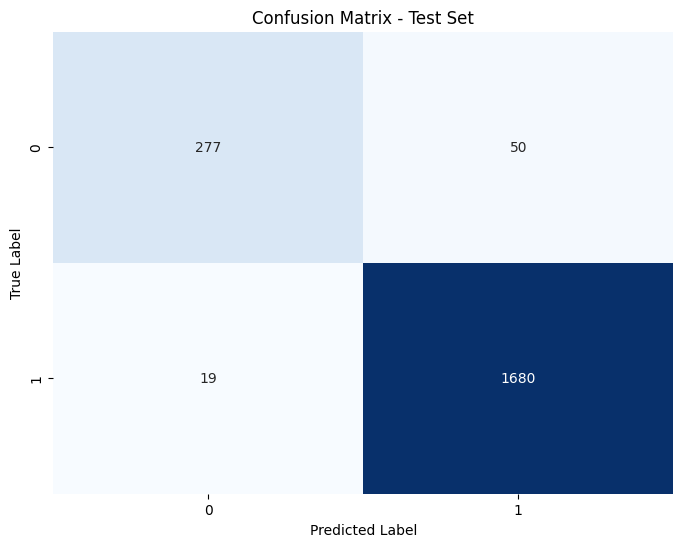

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree Classifier Parameter Grid
param_grid_dt = {
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001],
}

# Defining the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=1)

# Calling RandomizedSearchCV for hyperparameter tuning with undersampled data
randomized_cv_dt_un = RandomizedSearchCV(estimator=model_dt, param_distributions=param_grid_dt, n_iter=10, n_jobs=-1, scoring='recall', cv=5, random_state=1)

# To fit the model with undersampled data
randomized_cv_dt_un.fit(X_train_un, y_train_un)

# Printing the best parameters and CV score
print("Best parameters are {} with CV score={}".format(randomized_cv_dt_un.best_params_, randomized_cv_dt_un.best_score_))

# Model Comparison and Final Model Selection

# Defining models to compare
models = [
    ("Decision Tree", DecisionTreeClassifier(**randomized_cv_dt_un.best_params_, random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1)),
    ("AdaBoost", AdaBoostClassifier(random_state=1))
]

# Comparing models using recall score
print("\nModel Comparison on Validation Data:\n")
for name, model in models:
    model.fit(X_train_scaled, y_train)
    recall = recall_score(y_test, model.predict(X_test_scaled))
    print(f"{name}: Recall = {recall:.4f}")

# Final Model Selection based on Recall
best_model = GradientBoostingClassifier(random_state=1)
best_model.fit(X_train_scaled, y_train)
print(f"\nBest Model: Gradient Boosting with Recall = {recall_score(y_test, best_model.predict(X_test_scaled)):.4f}")

# Test Set Final Performance
print("\nTest Set Performance:\n")
y_pred = best_model.predict(X_test_scaled)

# Calculating metrics
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()


# Summary
* Gradient Boosting has shown the best performance, achieving a high recall score on both the validation and test sets, which means it effectively minimizes false negatives.
* Precision and F1 score are also high, indicating a good balance of minimizing both false positives and false negatives.
* Overall, Gradient Boosting can be considered a well-suited model for predicting customer churn, especially when minimizing false negatives is crucial to reduce churn-related losses.


# Business Insights and Conclusions

### Revolving Balance:
A revolving balance is the amount of credit that carries over from one month to the next when a customer does not pay the full balance. Customers with high revolving balances may be at a higher risk of churn, as it indicates financial stress.


* Different customer segments, such as age groups or income levels, may be affected differently by high revolving balances. Identifying these segments can help tailor retention strategies more effectively.



### Average Open to Buy:
'Open to Buy' refers to the amount left on the credit card to use, representing the available credit left for spending. Customers with a low average open to buy may have lower spending power and could also be more prone to financial stress.

* Customers with higher 'Open to Buy' are potentially more valuable for cross-selling other financial products, such as personal loans or additional credit cards.


### Average Utilization Ratio:
The Avg_Utilization_Ratio represents how much of the available credit the customer has used. A high utilization ratio can negatively impact credit scores. Customers with a high utilization ratio may be at a higher risk of churn, as it indicates they are close to maxing out their credit limits.

* Educating customers about the importance of maintaining a lower utilization ratio could improve customer retention and financial health. Proactive communication can help reduce churn by increasing customer awareness of how their credit usage affects their credit scores.


### Relationship Between Avg_Open_To_Buy, Credit_Limit, and Avg_Utilization_Ratio:


* This indicates that as customers use more of their credit (higher utilization ratio), their available open-to-buy amount decreases. Understanding this relationship can help in predicting customer behavior and identifying those at risk of churn due to high credit utilization.

# Key Business Recommendations:

* Focus on customers with high revolving balances and high utilization ratios, as these are key indicators of financial stress, which may lead to churn.

* Provide financial wellness programs or credit counseling to customers with high utilization ratios to help them better manage their spending and avoid maxing out their credit limits.

* Monitor customers with low 'open to buy' amounts, as they may be more likely to experience financial difficulties, and proactively offer credit limit increases where appropriate.

* Use the insights from the Gradient Boosting model to identify at-risk customers early and implement retention strategies such as personalized offers, interest rate reductions, or payment plan flexibility.

***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Export Google Colab notebook as an HTML file

from google.colab import files

# Command to convert the current notebook to HTML, specifying output file name
!jupyter nbconvert --to html '/content/drive/MyDrive/Python Course/Projects/MattStaney_AML_Project_LearnerNotebook_FullCode (1).ipynb' --output 'MattStaney_AML_Project_LearnerNotebook_FullCode.html'

# Download the generated HTML file using the correct file name
files.download('MattStaney_AML_Project_LearnerNotebook_FullCode.html')

[NbConvertApp] Converting notebook /content/drive/MyDrive/Python Course/Projects/MattStaney_AML_Project_LearnerNotebook_FullCode (1).ipynb to html
[NbConvertApp] Writing 1049220 bytes to /content/drive/MyDrive/Python Course/Projects/MattStaney_AML_Project_LearnerNotebook_FullCode.html


FileNotFoundError: Cannot find file: MattStaney_AML_Project_LearnerNotebook_FullCode.html